In [3]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('aal.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2013-12-10,23.698,24.345,23.610,24.064,18043837,0
1,2013-12-11,24.607,26.288,24.539,25.139,43224764,0
2,2013-12-12,25.342,25.832,24.616,24.616,20749989,0
3,2013-12-13,24.771,25.437,24.684,25.369,12588700,0
4,2013-12-16,25.749,25.888,25.485,25.739,17136729,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
984,2017-11-06,47.356,47.995,47.177,47.406,4258497,0
985,2017-11-07,47.406,47.406,46.299,46.358,3763615,0
986,2017-11-08,46.319,46.877,45.740,46.269,3205573,0
987,2017-11-09,45.750,46.249,45.261,45.670,3567014,0
988,2017-11-10,45.640,46.120,45.560,45.820,2433022,0


In [5]:

df1=df.reset_index()['Close']
df1

0      24.064
1      25.139
2      24.616
3      25.369
4      25.739
        ...  
984    47.406
985    46.358
986    46.269
987    45.670
988    45.820
Name: Close, Length: 989, dtype: float64

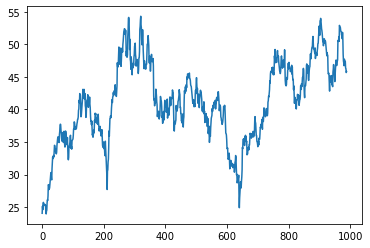

In [6]:
#setting index as date
#df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
#df.index = df['Date']

#plot
#plt.figure(figsize=(16,8))
#plt.plot(df['Close'], label='Close Price history')
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [8]:

import numpy as np

df1

0      24.064
1      25.139
2      24.616
3      25.369
4      25.739
        ...  
984    47.406
985    46.358
986    46.269
987    45.670
988    45.820
Name: Close, Length: 989, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.00319605]
 [0.03861614]
 [0.02138386]
 [0.0461944 ]
 [0.0583855 ]
 [0.04210873]
 [0.0461944 ]
 [0.04276771]
 [0.04939044]
 [0.0447117 ]
 [0.04685338]
 [0.0430972 ]
 [0.00514003]
 [0.        ]
 [0.01499176]
 [0.01855025]
 [0.05621087]
 [0.07169687]
 [0.06797364]
 [0.0908402 ]
 [0.14794069]
 [0.14570016]
 [0.12336079]
 [0.13037891]
 [0.12945634]
 [0.14537068]
 [0.16701812]
 [0.18741351]
 [0.20467875]
 [0.20942339]
 [0.17911038]
 [0.1721911 ]
 [0.22879736]
 [0.26138386]
 [0.28751236]
 [0.27957166]
 [0.29261944]
 [0.295486  ]
 [0.28751236]
 [0.31495881]
 [0.34711697]
 [0.34421746]
 [0.32988468]
 [0.31588138]
 [0.32672158]
 [0.30691928]
 [0.30375618]
 [0.31271829]
 [0.34678748]
 [0.36306425]
 [0.3783196 ]
 [0.38955519]
 [0.38144975]
 [0.37551895]
 [0.38728171]
 [0.36082372]
 [0.40039539]
 [0.4169028 ]
 [0.44714992]
 [0.4538715 ]
 [0.45196046]
 [0.42392092]
 [0.40724876]
 [0.38115321]
 [0.36843493]
 [0.41179572]
 [0.40072488]
 [0.39196046]
 [0.37551895]
 [0.36115321]
 [0.3830972 ]
 [0.41

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(642, 347)

In [13]:
train_data

array([[0.00319605],
       [0.03861614],
       [0.02138386],
       [0.0461944 ],
       [0.0583855 ],
       [0.04210873],
       [0.0461944 ],
       [0.04276771],
       [0.04939044],
       [0.0447117 ],
       [0.04685338],
       [0.0430972 ],
       [0.00514003],
       [0.        ],
       [0.01499176],
       [0.01855025],
       [0.05621087],
       [0.07169687],
       [0.06797364],
       [0.0908402 ],
       [0.14794069],
       [0.14570016],
       [0.12336079],
       [0.13037891],
       [0.12945634],
       [0.14537068],
       [0.16701812],
       [0.18741351],
       [0.20467875],
       [0.20942339],
       [0.17911038],
       [0.1721911 ],
       [0.22879736],
       [0.26138386],
       [0.28751236],
       [0.27957166],
       [0.29261944],
       [0.295486  ],
       [0.28751236],
       [0.31495881],
       [0.34711697],
       [0.34421746],
       [0.32988468],
       [0.31588138],
       [0.32672158],
       [0.30691928],
       [0.30375618],
       [0.312

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(541, 100)
(541,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(246, 100)
(246,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 541 samples, validate on 246 samples
Epoch 1/100
541/541 [==============================] - 8s 15ms/sample - loss: 0.1466 - val_loss: 0.0306
Epoch 2/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0272 - val_loss: 0.0535
Epoch 3/100
541/541 [==============================] - 2s 3ms/sample - loss: 0.0166 - val_loss: 0.0062
Epoch 4/100
541/541 [==============================] - 1s 2ms/sample - loss: 0.0130 - val_loss: 0.0217
Epoch 5/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0111 - val_loss: 0.0070
Epoch 6/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0097 - val_loss: 0.0122
Epoch 7/100
541/541 [==============================] - 1s 2ms/sample - loss: 0.0090 - val_loss: 0.0069
Epoch 8/100
541/541 [==============================] - 2s 3ms/sample - loss: 0.0082 - val_loss: 0.0067
Epoch 9/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0077 - val_loss: 0.0062
Epoch 10/100
541/541 [====

541/541 [==============================] - 2s 3ms/sample - loss: 0.0018 - val_loss: 0.0015
Epoch 80/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0018 - val_loss: 0.0015
Epoch 81/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0018 - val_loss: 0.0017
Epoch 82/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0019 - val_loss: 0.0024
Epoch 83/100
541/541 [==============================] - 2s 5ms/sample - loss: 0.0020 - val_loss: 0.0021
Epoch 84/100
541/541 [==============================] - 2s 5ms/sample - loss: 0.0019 - val_loss: 0.0014
Epoch 85/100
541/541 [==============================] - 3s 5ms/sample - loss: 0.0018 - val_loss: 0.0013
Epoch 86/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0017 - val_loss: 0.0012
Epoch 87/100
541/541 [==============================] - 2s 4ms/sample - loss: 0.0016 - val_loss: 0.0016
Epoch 88/100
541/541 [==============================] - 2s 4ms/sample - loss:

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.1.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

41.09309423180824

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

46.43691940587531

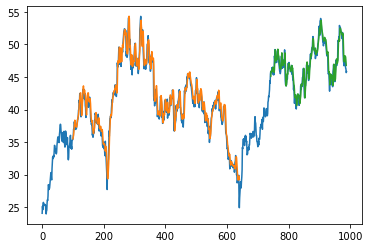

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:

len(test_data)

347

In [34]:
x_input=test_data[247:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
x_input

array([[0.8170346 , 0.80589786, 0.81080725, 0.8016145 , 0.82622735,
        0.8383855 , 0.86131796, 0.8629654 , 0.89215815, 0.91812191,
        0.95024712, 0.93808896, 0.90365733, 0.97551895, 0.97584843,
        0.9892916 , 0.97782537, 0.95416804, 0.93647446, 0.9276112 ,
        0.91350906, 0.89281713, 0.87087315, 0.88398682, 0.8508402 ,
        0.86691928, 0.86527183, 0.88563427, 0.86560132, 0.86889621,
        0.87706755, 0.86988468, 0.8508402 , 0.83113674, 0.80649094,
        0.79990115, 0.81502471, 0.80550247, 0.80187809, 0.72362438,
        0.70784185, 0.71311367, 0.70326194, 0.65591433, 0.62138386,
        0.69799012, 0.68813839, 0.67532125, 0.66741351, 0.6815486 ,
        0.69996705, 0.65426689, 0.66708402, 0.65130148, 0.64375618,
        0.71805601, 0.7321911 , 0.75551895, 0.72889621, 0.72263591,
        0.69996705, 0.66939044, 0.70359143, 0.7321911 , 0.75749588,
        0.77855025, 0.77525535, 0.75060956, 0.77163097, 0.77163097,
        0.77953871, 0.87093904, 0.87815486, 0.87

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.8170345963756177,
 0.8058978583196047,
 0.8108072487644152,
 0.8016144975288305,
 0.8262273476112026,
 0.8383855024711696,
 0.8613179571663921,
 0.8629654036243822,
 0.892158154859967,
 0.9181219110378912,
 0.9502471169686982,
 0.9380889621087315,
 0.9036573311367381,
 0.9755189456342667,
 0.9758484349258648,
 0.9892915980230642,
 0.977825370675453,
 0.954168039538715,
 0.9364744645799009,
 0.9276112026359141,
 0.9135090609555189,
 0.8928171334431628,
 0.8708731466227347,
 0.8839868204283362,
 0.850840197693575,
 0.8669192751235585,
 0.8652718286655684,
 0.8856342668863263,
 0.8656013179571663,
 0.8688962108731465,
 0.8770675453047777,
 0.8698846787479407,
 0.850840197693575,
 0.8311367380560132,
 0.8064909390444809,
 0.7999011532125205,
 0.81502471169687,
 0.8055024711696867,
 0.8018780889621085,
 0.723624382207578,
 0.7078418451400329,
 0.7131136738056013,
 0.7032619439868205,
 0.6559143327841844,
 0.6213838550247116,
 0.6979901153212521,
 0.6881383855024711,
 0.675321252059308,
 

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)  #data.reshape((50,1104,-1))
        x_input = x_input.reshape(1, n_steps , 1)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape(1, n_steps , 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7307443]
101
1 day input [0.80589786 0.81080725 0.8016145  0.82622735 0.8383855  0.86131796
 0.8629654  0.89215815 0.91812191 0.95024712 0.93808896 0.90365733
 0.97551895 0.97584843 0.9892916  0.97782537 0.95416804 0.93647446
 0.9276112  0.91350906 0.89281713 0.87087315 0.88398682 0.8508402
 0.86691928 0.86527183 0.88563427 0.86560132 0.86889621 0.87706755
 0.86988468 0.8508402  0.83113674 0.80649094 0.79990115 0.81502471
 0.80550247 0.80187809 0.72362438 0.70784185 0.71311367 0.70326194
 0.65591433 0.62138386 0.69799012 0.68813839 0.67532125 0.66741351
 0.6815486  0.69996705 0.65426689 0.66708402 0.65130148 0.64375618
 0.71805601 0.7321911  0.75551895 0.72889621 0.72263591 0.69996705
 0.66939044 0.70359143 0.7321911  0.75749588 0.77855025 0.77525535
 0.75060956 0.77163097 0.77163097 0.77953871 0.87093904 0.87815486
 0.87258649 0.8969028  0.8738715  0.95377265 0.94721582 0.94128501
 0.94293245 0.92879736 0.92220758 0.92088962 0.90378913 0.91762768
 0.88639209 0.91825371 0.88771005 0

12 day output [[0.781477]]
13 day input [0.97551895 0.97584843 0.9892916  0.97782537 0.95416804 0.93647446
 0.9276112  0.91350906 0.89281713 0.87087315 0.88398682 0.8508402
 0.86691928 0.86527183 0.88563427 0.86560132 0.86889621 0.87706755
 0.86988468 0.8508402  0.83113674 0.80649094 0.79990115 0.81502471
 0.80550247 0.80187809 0.72362438 0.70784185 0.71311367 0.70326194
 0.65591433 0.62138386 0.69799012 0.68813839 0.67532125 0.66741351
 0.6815486  0.69996705 0.65426689 0.66708402 0.65130148 0.64375618
 0.71805601 0.7321911  0.75551895 0.72889621 0.72263591 0.69996705
 0.66939044 0.70359143 0.7321911  0.75749588 0.77855025 0.77525535
 0.75060956 0.77163097 0.77163097 0.77953871 0.87093904 0.87815486
 0.87258649 0.8969028  0.8738715  0.95377265 0.94721582 0.94128501
 0.94293245 0.92879736 0.92220758 0.92088962 0.90378913 0.91762768
 0.88639209 0.91825371 0.88771005 0.80846787 0.7739374  0.76375618
 0.74962109 0.78313015 0.76738056 0.77031301 0.77228995 0.73775947
 0.73482702 0.71509061 

24 day output [[0.81248784]]
25 day input [0.86691928 0.86527183 0.88563427 0.86560132 0.86889621 0.87706755
 0.86988468 0.8508402  0.83113674 0.80649094 0.79990115 0.81502471
 0.80550247 0.80187809 0.72362438 0.70784185 0.71311367 0.70326194
 0.65591433 0.62138386 0.69799012 0.68813839 0.67532125 0.66741351
 0.6815486  0.69996705 0.65426689 0.66708402 0.65130148 0.64375618
 0.71805601 0.7321911  0.75551895 0.72889621 0.72263591 0.69996705
 0.66939044 0.70359143 0.7321911  0.75749588 0.77855025 0.77525535
 0.75060956 0.77163097 0.77163097 0.77953871 0.87093904 0.87815486
 0.87258649 0.8969028  0.8738715  0.95377265 0.94721582 0.94128501
 0.94293245 0.92879736 0.92220758 0.92088962 0.90378913 0.91762768
 0.88639209 0.91825371 0.88771005 0.80846787 0.7739374  0.76375618
 0.74962109 0.78313015 0.76738056 0.77031301 0.77228995 0.73775947
 0.73482702 0.71509061 0.72003295 0.7307443  0.7392925  0.7504077
 0.76064825 0.76911914 0.77549464 0.77974826 0.78211427 0.78300726
 0.78292453 0.7823649

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

989

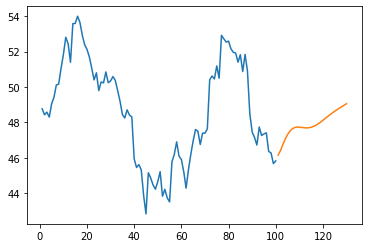

In [42]:
# df1 - 100 = 889 , hundred day prediction
plt.plot(day_new,scaler.inverse_transform(df1[889:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

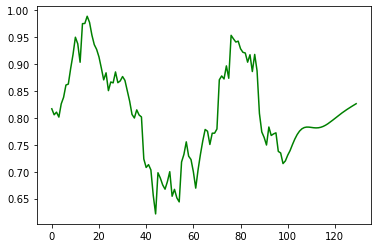

In [44]:
#continuous prediction for next 30 days 
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[889:],color='green')

In [45]:
df3=scaler.inverse_transform(df3).tolist()

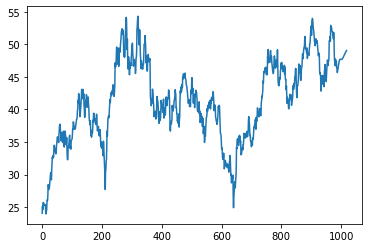

In [46]:
plt.plot(df3)